In [1]:
import json
import sys
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import heapq
from matplotlib import rcParams

In [2]:
repo_stat_filename = "OSLOM/repo_statistics.txt"
repo_feature_stat_filename = "OSLOM/repo_feature_statistics.txt"

blue = "#3333FF"

rcParams['axes.labelsize'] = 18
rcParams['ytick.labelsize'] = 18
rcParams['xtick.labelsize'] = 18
rcParams['axes.titlesize'] = 18

save_dir = 'charts/'

In [3]:
# Computing statistics...
repos = []
repo_contrs = []
repo_contrs_by_teams = []
repo_contrs_by_single_teams = []
repo_sizes = []
repo_ratio_of_teams = []
repo_ratio_of_single_teams = []
# repo_team_cnts = []
with open(repo_stat_filename) as tmj:
    for tml in tmj.readlines():
        repo,cnt_t,contr,contr_t,size,size_t,contr_t_s,size_t_s = tml.split('\t')
        repos.append(repo)
#         repo_team_cnts.append(int(cnt_t))
        repo_contrs.append(int(contr))
        repo_sizes.append(int(size))
        repo_contrs_by_teams.append(json.loads(contr_t))
        repo_contrs_by_single_teams.append(json.loads(contr_t_s))
        repo_ratio_of_teams.append(json.loads(size_t))
        repo_ratio_of_single_teams.append(json.loads(size_t_s))

# fig, ax = plt.subplots()
# ax.hist(repo_team_cnts,range=(0,30),bins=30,color=blue)
# ax.set_xlim(left=1)
# ax.set_xticks(list(range(1,31)))
# ax.set_xlabel("#Teams in Repos")
# ax.set_ylabel("Count")

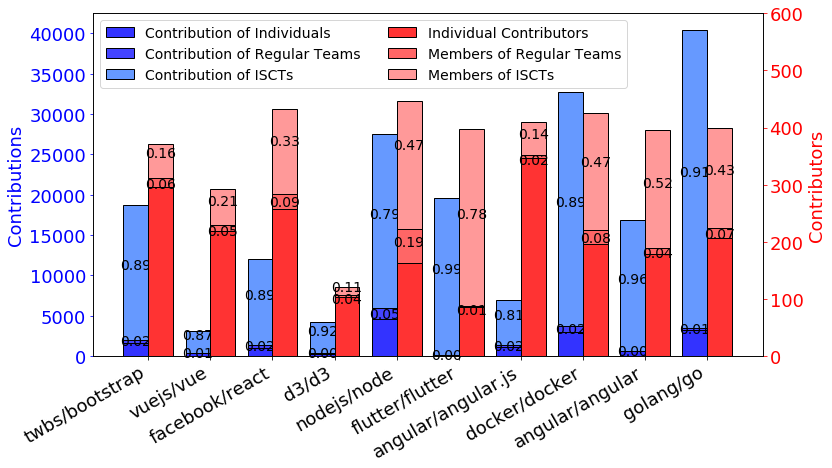

In [4]:
# repo_cnt = 10
# sorted_indices = sorted(range(len(repos)),key=lambda x: repo_contrs[x],reverse=True)
# display_indices = [sorted_indices[int(len(repos)/repo_cnt*i)] for i in range(repo_cnt)]
display_indices = [repos.index(r) for r in ["twbs/bootstrap","vuejs/vue","facebook/react","d3/d3","nodejs/node","flutter/flutter","angular/angular.js","docker/docker","angular/angular","golang/go"]]
repo_cnt = len(display_indices)
fig, ax = plt.subplots()
par1 = ax.twinx()
bar_width = 0.4


r_cons = [(repo_contrs[i]-repo_contrs_by_teams[i]-repo_contrs_by_single_teams[i])for i in display_indices]
t_cons = [repo_contrs_by_teams[i] for i in display_indices]
t_s_cons = [repo_contrs_by_single_teams[i] for i in display_indices]
b_cons = [(repo_contrs[i]-repo_contrs_by_teams[i])for i in display_indices]

r_siz = [repo_sizes[i]-repo_ratio_of_teams[i]-repo_ratio_of_single_teams[i] for i in display_indices]
t_siz = [repo_ratio_of_teams[i] for i in display_indices]
t_s_siz = [repo_ratio_of_single_teams[i]*1.5 for i in display_indices]
b_siz = [repo_sizes[i]-repo_ratio_of_teams[i] for i in display_indices]

bar1 = ax.bar(range(repo_cnt),r_cons,bar_width,color="#3333FF",label='contribution',edgecolor='black')
br1 = ax.bar(range(repo_cnt),t_s_cons,bar_width,bottom=r_cons,color="#4444FF",edgecolor='black')
b1 = ax.bar(range(repo_cnt),t_cons,bar_width,bottom=b_cons,color="#6699FF",edgecolor='black')


bar2 = par1.bar([ind+bar_width for ind in range(repo_cnt)],r_siz,bar_width,color="#FF3333",label='contributors',edgecolor='black')
br2 = par1.bar([ind+bar_width for ind in range(repo_cnt)],t_s_siz,bar_width,bottom=r_siz,color="#FF6666",edgecolor='black')
b2 = par1.bar([ind+bar_width for ind in range(repo_cnt)],t_siz,bar_width,bottom=b_siz,color="#FF9999",edgecolor='black')
ax.set_xticklabels([repos[i] for i in display_indices])
# ax.set_yticklabels(list(range(0,60001,10000)))
ax.set_xticks([i+bar_width/2 for i in range(repo_cnt)])
ax.set_ylabel("Contributions",color='b')
ax.tick_params(axis='y', colors='b')
# ax.set_ylim(0,120000)
par1.set_yticklabels(list(range(0,601,100)))
par1.set_ylabel("Contributors",color='r')
par1.tick_params(axis='y', colors='r')
par1.set_ylim(0,600)
fig.autofmt_xdate()
ax.legend([bar1,br1,b1,bar2,br2,b2], ["Contribution of Individuals","Contribution of Regular Teams","Contribution of ISCTs","Individual Contributors","Members of Regular Teams","Members of ISCTs"],ncol=2,fontsize=14)

for i in range(repo_cnt):
    ax.text(i, r_cons[i]+t_cons[i]/2+t_s_cons[i]-7,"%.2f"%(t_cons[i]/(t_cons[i]+t_s_cons[i]+r_cons[i])), ha='center', va='bottom',fontsize=14)
    ax.text(i, r_cons[i]+t_s_cons[i]/2-7,"%.2f"%(t_s_cons[i]/(t_cons[i]+t_s_cons[i]+r_cons[i])), ha='center', va='center',fontsize=14)
    par1.text(i+bar_width, r_siz[i]+t_siz[i]/2+t_s_siz[i]-7,"%.2f"%(t_siz[i]/(t_siz[i]+t_s_siz[i]+r_siz[i])), ha='center', va='bottom',fontsize=14)
    par1.text(i+bar_width, r_siz[i]+t_s_siz[i]/2-7,"%.2f"%(t_s_siz[i]/(t_siz[i]+t_s_siz[i]+r_siz[i])), ha='center', va='center',fontsize=14)



fig.set_size_inches(12,7)
fig.savefig(save_dir+'TeamContributionRepos.pdf',bbox_inches='tight')


In [5]:
from datetime import datetime

cntr_test_A = []
cntr_test_B = []
with open(repo_feature_stat_filename) as tmj:
    cntr_test_A = json.loads(tmj.readline())
    tmj.readline()
    tmj.readline()
    cntr_test_B = json.loads(tmj.readline())
    

for i in range(len(cntr_test_A)):
    cntr_test_A[i][3] = datetime.strptime(cntr_test_A[i][3][1], '%Y-%m-%dT%H:%M:%SZ')-datetime.strptime(cntr_test_A[i][3][0], '%Y-%m-%dT%H:%M:%SZ')
for i in range(len(cntr_test_B)):
    cntr_test_B[i][3] = datetime.strptime(cntr_test_B[i][3][1], '%Y-%m-%dT%H:%M:%SZ')-datetime.strptime(cntr_test_B[i][3][0], '%Y-%m-%dT%H:%M:%SZ')

In [6]:
import pandas as pd
cntr_test_A_pd = pd.DataFrame(cntr_test_A,columns=['size','forks','contributors','lifetime','max_topic_repos','max_lang_repos','mean_topic_repos','mean_lang_repos','contr_rate'])
cntr_test_A_pd['size'] = pd.to_numeric(cntr_test_A_pd['size'])
cntr_test_A_pd['forks'] = pd.to_numeric(cntr_test_A_pd['forks'])
cntr_test_A_pd['contributors'] = pd.to_numeric(cntr_test_A_pd['contributors'])
cntr_test_A_pd['contr_rate'] = pd.to_numeric(cntr_test_A_pd['contr_rate'])
cntr_test_A_pd['lifetime'] = pd.to_timedelta(cntr_test_A_pd['lifetime'])
cntr_test_A_pd['max_topic_repos'] = pd.to_numeric(cntr_test_A_pd['max_topic_repos'])
cntr_test_A_pd['max_lang_repos'] = pd.to_numeric(cntr_test_A_pd['max_lang_repos'])
cntr_test_A_pd['mean_topic_repos'] = pd.to_numeric(cntr_test_A_pd['mean_topic_repos'])
cntr_test_A_pd['mean_lang_repos'] = pd.to_numeric(cntr_test_A_pd['mean_lang_repos'])

cntr_test_A_pd.describe()

,size,forks,contributors,lifetime,max_topic_repos,max_lang_repos,mean_topic_repos,mean_lang_repos,contr_rate
count,4.519130e+05,451913.000000,451913.000000,451913,451913.000000,451913.000000,451913.000000,451913.000000,451913.000000
mean,8.576120e+04,314.568162,112.444794,714 days 08:16:32.735613,512.901636,51820.829363,143.318421,38284.266891,2.583656
std,3.015311e+05,1799.480145,130.269391,710 days 00:30:09.489385,1285.486445,25782.215142,363.369778,20574.575282,5.853803
min,0.000000e+00,0.000000,10.000000,0 days 00:00:00,0.000000,1.000000,0.000000,1.000000,0.000640
25%,1.262000e+03,3.000000,18.000000,25 days 23:04:41,0.000000,28081.000000,0.000000,21256.000000,0.286878
50%,8.933000e+03,21.000000,44.000000,482 days 21:48:04,0.000000,54209.000000,0.000000,39467.500000,1.036450
75%,5.611200e+04,104.000000,174.000000,1316 days 17:15:47,180.000000,85763.000000,75.666667,51991.500000,2.568765
max,1.537041e+07,82488.000000,489.000000,2007 days 23:58:03,5795.000000,85763.000000,5795.000000,85763.000000,162.996271


In [7]:
cntr_test_B_pd = pd.DataFrame(cntr_test_B,columns=['size','forks','contributors','lifetime','max_topic_repos','max_lang_repos','mean_topic_repos','mean_lang_repos','contr_rate'])
cntr_test_B_pd['size'] = pd.to_numeric(cntr_test_B_pd['size'])
cntr_test_B_pd['forks'] = pd.to_numeric(cntr_test_B_pd['forks'])
cntr_test_B_pd['contributors'] = pd.to_numeric(cntr_test_B_pd['contributors'])
cntr_test_B_pd['contr_rate'] = pd.to_numeric(cntr_test_B_pd['contr_rate'])
cntr_test_B_pd['lifetime'] = pd.to_timedelta(cntr_test_B_pd['lifetime'])
cntr_test_B_pd['max_topic_repos'] = pd.to_numeric(cntr_test_B_pd['max_topic_repos'])
cntr_test_B_pd['max_lang_repos'] = pd.to_numeric(cntr_test_B_pd['max_lang_repos'])
cntr_test_B_pd['mean_topic_repos'] = pd.to_numeric(cntr_test_B_pd['mean_topic_repos'])
cntr_test_B_pd['mean_lang_repos'] = pd.to_numeric(cntr_test_B_pd['mean_lang_repos'])

cntr_test_B_pd.describe()

,size,forks,contributors,lifetime,max_topic_repos,max_lang_repos,mean_topic_repos,mean_lang_repos,contr_rate
count,1.352398e+06,1.352398e+06,1.352398e+06,1352398,1.352398e+06,1.352398e+06,1.352398e+06,1.352398e+06,1.352398e+06
mean,3.286998e+05,1.844795e+02,1.782969e+02,422 days 11:49:25.267679,2.879930e+02,5.253958e+04,8.011099e+01,3.804023e+04,3.357653e+00
std,1.517643e+06,1.369468e+03,1.504565e+02,616 days 05:20:59.933528,9.967348e+02,2.529755e+04,2.814928e+02,1.980921e+04,7.818986e+00
min,0.000000e+00,0.000000e+00,1.000000e+01,0 days 00:00:00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,5.521811e-04
25%,4.257250e+03,0.000000e+00,3.200000e+01,0 days 00:00:00,0.000000e+00,3.413300e+04,0.000000e+00,2.134450e+04,2.820319e-01
50%,3.129950e+04,1.000000e+00,1.320000e+02,54 days 22:46:18,0.000000e+00,5.420900e+04,0.000000e+00,3.946750e+04,1.039602e+00
75%,1.429290e+05,2.500000e+01,3.290000e+02,678 days 08:52:14,0.000000e+00,8.576300e+04,0.000000e+00,5.199150e+04,3.067584e+00
max,2.307972e+07,8.248800e+04,4.890000e+02,2007 days 23:58:03,5.795000e+03,8.576300e+04,5.795000e+03,8.576300e+04,1.616542e+02


In [10]:
from scipy import stats
cntr_test_A = np.array(cntr_test_A)
cntr_A = np.asarray(cntr_test_A[:,-1],dtype=np.float32)
t,p_twotail=stats.ttest_1samp(cntr_A,1)
p_onetail=p_twotail/2
print(t,p_onetail,cntr_A.size-1)

CI = 1.6449*stats.sem(cntr_A)
print(cntr_A.mean(),cntr_A.std())
print(cntr_A.mean()-CI,cntr_A.mean()+CI)
print((cntr_A.mean()-1)/cntr_A.std())

181.86546995594105 0.0 451912
2.5836563 5.8537965
2.5693327765548175 2.597979845515495
0.2705349111267311


In [11]:
import statsmodels.stats.weightstats as st

cntr_test_B = np.array(cntr_test_B)
cntr_B = np.asarray(cntr_test_B[:,-1],dtype=np.float32)
t,p_twotail,df=st.ttest_ind(cntr_A,cntr_B,usevar='unequal')
print(t,p_twotail,df)
print(cntr_A.mean(),cntr_B.mean())

-70.35389213994283 0.0 1029142.9891961479
2.5836563 3.3576536
